In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [43]:
!pip install minisom

In [44]:
import os
import tarfile
from six.moves import urllib

FILE_TO_DOWNLOAD =  "posicoesBHC.csv"
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/matheus217/PROJECT_2_MACHINE_LEARNING_AND_KINECT/master/"
DATA_PATH = "KINECTDATA/"
DATA_URL = DOWNLOAD_ROOT + DATA_PATH + FILE_TO_DOWNLOAD

def fetch_data(data_url=DATA_URL, data_path=DATA_PATH, file_to_download=FILE_TO_DOWNLOAD):
  if not os.path.isdir(data_path):
    os.makedirs(data_path)
  urllib.request.urlretrieve(data_url, data_path+file_to_download)
  
  
fetch_data()

# observando se o diretório datasets foi criado com sucesso 
!ls KINECTDATA

posicoesBHC.csv


In [45]:
# Importing the dataset
dataset = pd.read_csv(DATA_PATH+'posicoesBHC.csv')

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values


dataset.head(  )

print(y)

[0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 4 4 4]


In [0]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

In [0]:
# Training the SOM
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 60, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

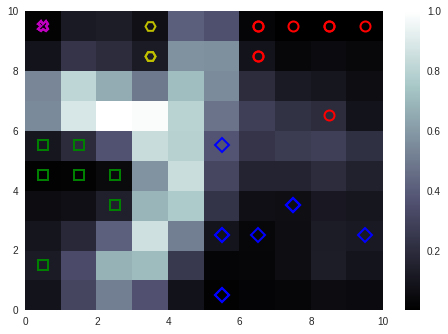

In [48]:
# Visualizing the results
#markers = ['o', 's', 'D', 'X', 'H']
#colors = ['r', 'g', 'b', 'm', 'y' ]
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's', 'D', 'X', 'H']
colors = ['r', 'g', 'b', 'm', 'y' ]
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()